In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

#       Exercice avec RandomForestRegressor
# Prédire les notes au baccalauréat selon des notes d'élèves dans l'année :

# Simuler des données réelles de notes de 4 élèves dans 3 matières :
# — il faut des notes / données pour faire la prédiction (les notes dans l'année)
# — il faut un exemple final pour valider ou non la prédiction, si elle est proche du réél ou non (les notes du bac de l'année passée)

df = pd.DataFrame({
    'maths' : [12, 8 , 15, 10],
    'francais' : [14, 9 , 16, 11],
    'histoire' : [13, 10 , 15, 14],
    # Les notes de ces élèves l'année précédente :
    'bac' : [ 15, 18, 9, 4]
})

# Etape 1 : Préparation des données avec train_test_split :
from sklearn.model_selection import train_test_split

    # avec x = les données sur lesquelles on s'appuie (les notes dans l'année)
x = df[['maths', 'francais', 'histoire']]
    # avec y = la prédiction que l'on doit approcher (les notes du bac précédent)
y = df['bac']

    # train_test_split() pour séparer les données entre entrainement et test pour le modèle

    # n_estimators=100 => the number of trees in the forest
    # random_state=0 => on fixe un int pour avoir toujours le même random utilisé

    # x_train = 80% des données d'entrainement soit 80% df[['maths', 'francais', 'histoire']]
    # x_test = 20% des données de test 20% soit df[['maths', 'francais', 'histoire']]
    # y_train = 80% des données réelles de prédiction d'entrainement soit 80% de df['bac']
    # y_train = 20% des données réelles de prédiction de test soit 20% de df['bac']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Etape 2 : Entrainement du modèle :

    # Instancier un modèle pré-écrit, on va prendre RandomForestRegressor() de sklearn.ensemble :
    # RandomForestRegressor : decision tree / modèle de décisions, pas que des moyennes de notes
model =  RandomForestRegressor(n_estimators=100, random_state=0)


model.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [15]:
# Etape 3 : Tester la prédiction :
# Tester de prédire les notes au bac de 2 nouveaux élèves
# Faire une simulation de deux élèves pour tester ce modèle de prédiction
df_predictions = pd.DataFrame({
    'maths': [5, 20],
    'francais': [4, 6],
    'histoire': [14, 7]
})

# Utiliser model.predict() qui return la prédiction et le tester
# avec en params : les notes des nouveaux élèves, équivalentes aux nouvelles données sur lesquelles ont s'appuie pour prédire
predictions_test = model.predict(df_predictions)

# afficher ces résultats, qui sont normalement les notes au bac prévues :
print(predictions_test)  # [ 7.72 11.09]

# Pour l'instant les données sont fausses, mais le modèle fonctionne, il marche.
# Il faut tester le modèle avant maintenant : regarder le mse de l'entrainement.

[ 7.72 11.09]


In [16]:
# Etape 4 : Vérifier le MSE de l'entrainement pour tester le modèle :
from sklearn.metrics import mean_squared_error

# Tester avec 1 seul élève, car on prend que 20% de 4 (=1) élèves dans y_test
df_un_seul_eleve = pd.DataFrame({
    'maths': [5],
    'francais': [4],
    'histoire': [14]
})

# Lancer le modèle sur ces data d'un seul élève
predict_for_mse = model.predict(df_un_seul_eleve)
print(f'predict_for_mse : {predict_for_mse}') # [7.72]
    # On trouve bien les mêmes notes que attendues
# Equivalent à lancer une prédiction (qui retourne predict_test) et comparer aux données de base, nos 20% de données prévues pour le test (y_test)
mse = mean_squared_error(y_test, predict_for_mse)

# Afficher le mse
print(mse)  # 105.67840000000002
# Le mse est très bien: mais on ne teste que sur une ligne donc pas suffisant, l'écart est trop grand. Si onn rajoute des élèves avec leurs notes, le mse diminue drastiquement


predict_for_mse : [7.72]
105.67840000000002


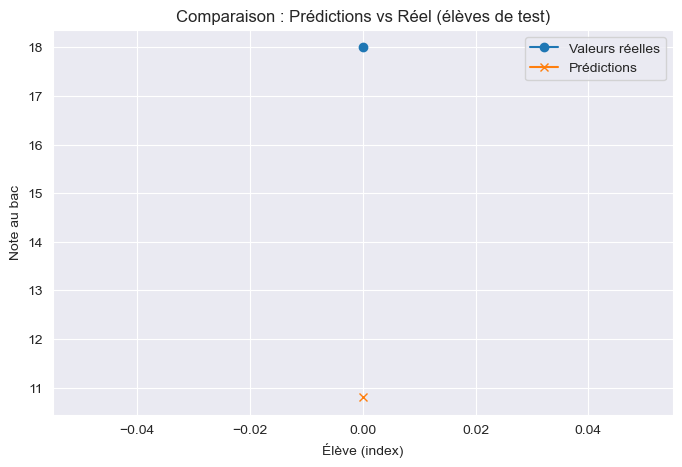

In [17]:
# Afficher un graphe d'écart entre les données réelles et les prédictions

# 1. Prédire les valeurs sur X_test (les mêmes élèves que y_test)
y_pred = model.predict(x_test)

# 2. Graphique : comparaison cohérente
plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label='Valeurs réelles', marker='o')
plt.plot(y_pred, label='Prédictions', marker='x')
plt.title('Comparaison : Prédictions vs Réel (élèves de test)')
plt.xlabel('Élève (index)')
plt.ylabel('Note au bac')
plt.legend()
plt.grid(True)
plt.show()

# Notre graphe n'est pas représentatif car pas assez de notes

In [12]:
# Etape 5 : Exporter le modèle en .pkl (= pickle) pour le réutiliser :

import pickle

# Utilisation du with pour contextualiser l'opération
# Ouvrir/Crééer une file avec pickle en écriture binaire (wb)
# et Dump les infos dans la file créée

with open('../models/model_predict_bac_random_forest.pkl', 'wb') as file:
    pickle.dump(model, file)